**Imports**

In [ ]:
!pip install pyccel
!pip install numba
import numpy as np
import scipy as sp
from scipy import special as ss
import scipy.linalg as lg
import matplotlib.pyplot as pl

import time
from time import process_time


from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

*transformation functions*

In [ ]:
def JT(x):
  return sp.array([[1,2],[-1,0]])                          #Jacobien de FT
  
  
  
def F(x):
  return sp.array([x[0],(1-x[0])*x[1]])                    #Transformation de Duffy

**Pure python function**

In [59]:
def factorisation_pure(d,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha):
  iteration=0
  q=d+1
  gij=0.
  for alpha1 in range(0,d+1):
    for beta1 in range(0,d+1):
      for alpha2 in range(0,d-alpha1+1):
        for beta2 in range(0,d-beta1+1):
          sum=0
          for i in range(0,3):
            alphai[0]=alpha1
            alphai[1]=alpha2
            alphai[2]=d-alpha1-alpha2
            alphai[i]=alphai[i]-1
            for j in range(0,3):
              betaj[1]=beta2
              betaj[2]=d-beta1-beta2
              betaj[0]=beta1
              betaj[j]=betaj[j]-1
              if alphai[0] >=0  and betaj[0] >=0  and alphai[1] >=0  and betaj[1] >=0 and alphai[2] >=0  and betaj[2] >=0 :
                sumr=0
                for r in range(0,q):
                  gij=det*invJTdLmada[i,j]
                  sumr=sumr+(gij*w1[r]*B1[r,int(alphai[0])]*B1[r,int(betaj[0])])
                sumsr=0
                for s in range(0,q):
                  sumsr=sumsr+(sumr*w0[s]*B0[s,int(d-1-alphai[0]),int(alphai[1])]*B0[s,int(d-1-betaj[0]),int(betaj[1])] )
                sum=sum+sumsr 
          KalphaBitha[iteration]=((0.5)**3)*(d**2)*sum
          iteration=iteration+1
  return 0          

*test*

In [60]:
p=2
q=p+1
t0,w0=ss.roots_jacobi(q,0,0)  
ita0=(1/2)+0.5*t0  
t1,w1=ss.roots_jacobi(q,1,0)
ita1=(1/2)+0.5*t1
C0=sp.diag(sp.ones(600))
C0[:,0]=sp.ones(600)
for n in range(1,600):                        # Formule de pascal
     for m in range(1,n+1):
        C0[n,m]= C0[n-1,m-1]+C0[n-1,m]
JT=sp.eye(2)
det=lg.det(JT)
iteration=0
ind=int(C0[p+2,2]**2)
KalphaBitha=np.zeros(ind)
alphai=np.zeros(3)
betaj=np.zeros(3)
Dlampda=np.array([[1,0],[0,1],[-1,-1]])                      # Dérivés des coordonnées barycentriques
invJTdLmada=np.zeros((3,3))
for i in range(3):
  for j in range(3):
    invJTdLmada[i,j]=sp.sum(Dlampda[i]*Dlampda[j])
    
B1=np.zeros((q,p)) 
B0=np.zeros((q,p,p))   
for s in range(q):
  x=ita0[s]
  for n in range(p):
    b = np.zeros(p)
    b[0] = 1.
    x1 = 1.-x
    for j in range(1, n+1):
      saved = 0.
      for i in range(0, j):
        tmp = b[i]
        b[i] = saved + x1*tmp
        saved = x*tmp
      b[j] = saved 
    B0[s,n,:]=b                                                      #all_bernstein
for s in range(q):
  x=ita1[s]
  b = np.zeros(p)
  b[0] = 1.
  x1 = 1.-x
  for j in range(1, p):
    saved = 0.
    for i in range(0, j):
      tmp = b[i]
      b[i] = saved + x1*tmp
      saved = x*tmp
    b[j] = saved
  B1[s,:]=b  
  '''
for s in range(q):
  x=ita0[s]
  y=ita1[s]
  for n in range(p):
    for k in range(n+1):                                           # the calculation with the analytical formula 
      B0[s,n,k]= C0[n,k]*((1-x)**(n-k))*(x**k)
    B1[s,n]=C0[p-1,n]*((1-y)**(p-1-n))*(y**n)  
'''  
factorisation_pure(p,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha)
print(KalphaBitha)

[ 6.66666667e-01 -1.11022302e-16 -1.66666667e-01 -1.11022302e-16
  6.66666667e-01 -1.66666667e-01 -1.66666667e-01 -1.66666667e-01
  3.33333333e-01  0.00000000e+00 -3.33333333e-01  5.55111512e-17
 -3.33333333e-01 -1.66666667e-01  1.66666667e-01 -1.66666667e-01
 -1.66666667e-01  0.00000000e+00  0.00000000e+00  5.55111512e-17
 -1.66666667e-01 -3.33333333e-01 -3.33333333e-01  1.66666667e-01
  6.66666667e-01 -3.33333333e-01 -3.33333333e-01  6.66666667e-01
 -1.66666667e-01  1.66666667e-01 -1.66666667e-01 -1.66666667e-01
  0.00000000e+00 -1.66666667e-01  1.66666667e-01  3.33333333e-01]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.eye is deprecated and will be removed in SciPy 2.0.0, use numpy.eye instead
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


**Numba accelerator**

In [61]:
@njit
def factorisation_numba(d,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha):
  iteration=0
  q=d+1
  gij=0.
  for alpha1 in range(0,d+1):
    for beta1 in range(0,d+1):
      for alpha2 in range(0,d-alpha1+1):
        for beta2 in range(0,d-beta1+1):
          sum=0
          for i in range(0,3):
            alphai[0]=alpha1
            alphai[1]=alpha2
            alphai[2]=d-alpha1-alpha2
            alphai[i]=alphai[i]-1
            for j in range(0,3):
              betaj[1]=beta2
              betaj[2]=d-beta1-beta2
              betaj[0]=beta1
              betaj[j]=betaj[j]-1
              if alphai[0] >=0  and betaj[0] >=0  and alphai[1] >=0  and betaj[1] >=0 and alphai[2] >=0  and betaj[2] >=0 :
                sumr=0
                for r in range(0,q):
                  gij=det*invJTdLmada[i,j]
                  sumr=sumr+(gij*w1[r]*B1[r,int(alphai[0])]*B1[r,int(betaj[0])])
                sumsr=0
                for s in range(0,q):
                  sumsr=sumsr+(sumr*w0[s]*B0[s,int(d-1-alphai[0]),int(alphai[1])]*B0[s,int(d-1-betaj[0]),int(betaj[1])] )
                sum=sum+sumsr 
          KalphaBitha[iteration]=((0.5)**3)*(d**2)*sum
          iteration=iteration+1
  return 0  

**Pyccel accelerator**

In [62]:
@types('int','int','float','float[:,:,:]','float[:,:]','float[:]','float[:]','float[:]','float[:]','float[:,:]','float[:]')
def factorisation_pyccel(d,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha):
  iteration=0
  q=d+1
  gij=0.
  for alpha1 in range(0,d+1):
    for beta1 in range(0,d+1):
      for alpha2 in range(0,d-alpha1+1):
        for beta2 in range(0,d-beta1+1):
          sum=0.
          for i in range(0,3):
            alphai[0]=alpha1
            alphai[1]=alpha2
            alphai[2]=d-alpha1-alpha2
            alphai[i]=alphai[i]-1
            for j in range(0,3):
              betaj[1]=beta2
              betaj[2]=d-beta1-beta2
              betaj[0]=beta1
              betaj[j]=betaj[j]-1
              if alphai[0] >=0  and betaj[0] >=0  and alphai[1] >=0  and betaj[1] >=0 and alphai[2] >=0  and betaj[2] >=0 :
                sumr=0.
                for r in range(0,q):
                  gij=det*invJTdLmada[i,j]
                  sumr=sumr+(gij*w1[r]*B1[r,int(alphai[0])]*B1[r,int(betaj[0])])
                sumsr=0.
                for s in range(0,q):
                  sumsr=sumsr+(sumr*w0[s]*B0[s,int(d-1-alphai[0]),int(alphai[1])]*B0[s,int(d-1-betaj[0]),int(betaj[1])] )
                sum=sum+sumsr 
          KalphaBitha[iteration]=((0.5)**3)*(d**2)*sum
          iteration=iteration+1
  return 0  

In [63]:
factorisation=epyccel(factorisation_pyccel,language='fortran')

**Inputs**

In [ ]:
iteration=0

Dlampda=np.array([[1,0],[0,1],[-1,-1]])                      # Dérivés des coordonnées barycentriques
invJTdLmada=np.zeros((3,3))
for i in range(3):
  for j in range(3):
    invJTdLmada[i,j]=sp.sum(Dlampda[i]*Dlampda[j])

C0=sp.diag(sp.ones(500))
C0[:,0]=sp.ones(500)
for n in range(1,500):                                   # Formule de pascal
     for m in range(1,n+1):
        C0[n,m]= C0[n-1,m-1]+C0[n-1,m]
JT=sp.eye(2)
det=lg.det(JT)

In [73]:
degremax=70

**time for pure function**

In [ ]:
temCPUpureF=[]
degre=[]
for i in range(1,degremax+1):
  degre.append(i)
  q=i+1
  t0,w0=ss.roots_jacobi(q,0,0)  
  ita0=(1/2)+0.5*t0  
  t1,w1=ss.roots_jacobi(q,1,0)                   #Méthode de Gauss-Jacobi
  ita1=(1/2)+0.5*t1
  ind=int(C0[i+2,2]**2)
  KalphaBitha=np.zeros(ind)
  alphai=np.zeros(3)
  betaj=np.zeros(3)
  B1=np.ones((q,i))
  B0=np.ones((q,i,i))
  t1r= process_time()
  '''
  for s in range(q):
    x=ita0[s]
    y=ita1[s]
    for n in range(i):
      for k in range(n+1):                                           # the calculation with the analytical formula 
        B0[s,n,k]= C0[n,k]*((1-x)**(n-k))*(x**k)
      B1[s,n]=C0[i-1,n]*((1-y)**(i-1-n))*(y**n)  
      '''
  factorisation_pure(i,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha)
  t2r= process_time()
  temCPUpureF.append(t2r-t1r)
  print(i)

**Time for function with pyccel accelerator**

In [ ]:
temCPUpyccelF=[]
degre=[]
for i in range(1,degremax+1):
  degre.append(i)
  q=i+1
  t0,w0=ss.roots_jacobi(q,0,0)  
  ita0=(1/2)+0.5*t0  
  t1,w1=ss.roots_jacobi(q,1,0)                   #Méthode de Gauss-Jacobi
  ita1=(1/2)+0.5*t1
  ind=int(C0[i+2,2]**2)
  KalphaBitha=np.zeros(ind)
  alphai=np.zeros(3)
  betaj=np.zeros(3)
  B1=np.ones((q,i))
  B0=np.ones((q,i,i))
  t1P= process_time()
  factorisation(i,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha)
  t2P= process_time()
  temCPUpyccelF.append(t2P-t1P)
  print(i)

**Time for function with numba accelerator**

In [ ]:
temCPUnumbaF=[]
degre=[]
for i in range(1,degremax+1):
  degre.append(i)
  q=i+1
  t0,w0=ss.roots_jacobi(q,0,0)  
  ita0=(1/2)+0.5*t0  
  t1,w1=ss.roots_jacobi(q,1,0)                   #Méthode de Gauss-Jacobi
  ita1=(1/2)+0.5*t1
  ind=int(C0[i+2,2]**2)
  KalphaBitha=np.zeros(ind)
  alphai=np.zeros(3)
  betaj=np.zeros(3)
  B1=np.ones((q,i))
  B0=np.ones((q,i,i))
  t1n= process_time()
  '''
  for s in range(q):
    x=ita0[s]
    y=ita1[s]
    for n in range(i):
      for k in range(n+1):                                           # the calculation with the analytical formula 
        B0[s,n,k]= C0[n,k]*((1-x)**(n-k))*(x**k)
      B1[s,n]=C0[i-1,n]*((1-y)**(i-1-n))*(y**n)  
      '''
  factorisation_numba(i,iteration,det,B0,B1,w0,w1,alphai,betaj,invJTdLmada,KalphaBitha)
  t2n= process_time()
  temCPUnumbaF.append(t2n-t1n)
  print(i)

*Plots*

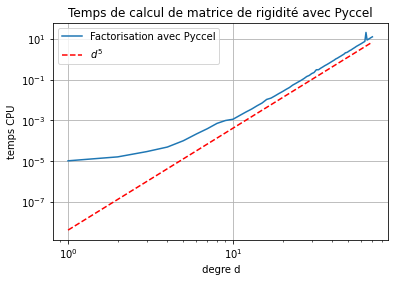

In [76]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUpyccelF,label='Factorisation avec Pyccel')
pl.title("Temps de calcul de matrice de rigidité avec Pyccel")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=4.1*(10**(-9))
Z=cst*(Degre**5)
pl.plot(degre,Z,'r--',label='$d^5$')
pl.legend()
pl.grid()
pl.show()

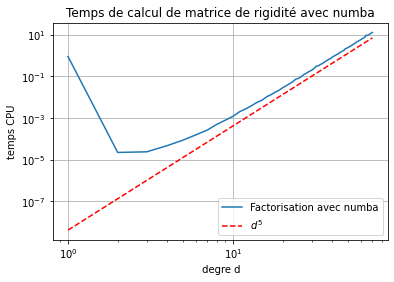

In [79]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUnumbaF,label='Factorisation avec numba')
pl.title("Temps de calcul de matrice de rigidité avec numba")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=4.21*(10**(-9))
Z=cst*(Degre**5)
pl.plot(degre,Z,'r--',label='$d^5$')
pl.legend()
pl.grid()
pl.show()

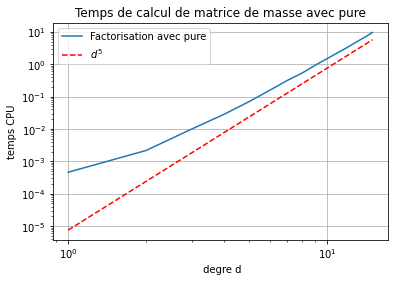

In [72]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUpureF,label='Factorisation avec pure')
pl.title("Temps de calcul de matrice de rigidité avec pure")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst= 7.5*(10**(-6))
Z=cst*(Degre**5)
pl.plot(degre,Z,'r--',label='$d^5$')
pl.legend()
pl.grid()
pl.show()

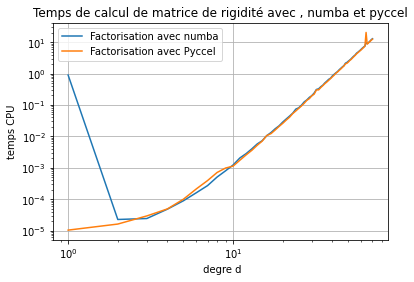

In [80]:
ax = pl.axes(xscale='log', yscale='log')
#pl.plot(degre,temCPUpureF,label='Factorisation avec pure')
pl.plot(degre,temCPUnumbaF,label='Factorisation avec numba')
pl.plot(degre,temCPUpyccelF,label='Factorisation avec Pyccel')
pl.title("Temps de calcul de matrice de rigidité avec , numba et pyccel")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=4.5*(10**(-10))
Z=cst*(Degre**5)
#pl.plot(degre,Z,'r--',label='$d^5$')
pl.legend()
pl.grid()
pl.show()